In [56]:
import pandas as pd 
import seaborn as sns
import warnings

In [57]:
warnings.filterwarnings('ignore')

## Membaca file

In [58]:
df = pd.read_csv('Forbes Top2000 2017.csv')
df.head()

,Unnamed: 0,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,NaN,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,NaN,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,NaN,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,NaN,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,NaN,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


## Mengecek apakah dataset terdapat nilai null

In [59]:
df.isnull().sum()

Unnamed: 0      2000
 Rank              0
Company            0
Country            0
Sales              0
Profits            0
Assets             0
Market Value       0
Sector           197
Industry         491
dtype: int64

## Menampilkan tipe data

In [60]:
df.dtypes


Unnamed: 0      float64
 Rank             int64
Company          object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market Value    float64
Sector           object
Industry         object
dtype: object

## Membersihkan dataset dengan menggunakan modus


In [61]:
from sklearn.impute import SimpleImputer

In [62]:
simpleImputerObjek = SimpleImputer(strategy = 'most_frequent')

In [63]:
df['Sector'] = simpleImputerObjek.fit_transform(df[['Sector']])
df['Industry'] = simpleImputerObjek.fit_transform(df[['Industry']])

In [64]:
df.isna().sum()

Unnamed: 0      2000
 Rank              0
Company            0
Country            0
Sales              0
Profits            0
Assets             0
Market Value       0
Sector             0
Industry           0
dtype: int64

## Mengubah atribut menjadi int

In [65]:
df['Sales'] = df['Sales'].astype('int64')
df['Assets'] = df['Assets'].astype('int64')



In [66]:
df.dtypes

Unnamed: 0      float64
 Rank             int64
Company          object
Country          object
Sales             int64
Profits         float64
Assets            int64
Market Value    float64
Sector           object
Industry         object
dtype: object

## Data scaling & pembuatan subset

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
df_subset = df[['Assets', 'Sales']]

In [69]:
ss = StandardScaler()

In [70]:
x_scaled = ss.fit_transform(df_subset)

## K-Means


In [71]:
from sklearn.cluster import KMeans

In [72]:
df['Country'].unique()

array(['China', 'United States', 'Japan', 'South Korea', 'Netherlands',
       'Germany', 'Hong Kong', 'France', 'Spain', 'Switzerland', 'Brazil',
       'Russia', 'Canada', 'United Kingdom', 'Australia', 'Taiwan',
       'Italy', 'India', 'Ireland', 'Saudi Arabia', 'Belgium', 'Sweden',
       'Thailand', 'Luxembourg', 'Qatar', 'Denmark', 'Singapore',
       'Norway', 'United Arab Emirates', 'Mexico', 'Indonesia',
       'Malaysia', 'South Africa', 'Austria', 'Israel', 'Portugal',
       'Finland', 'Turkey', 'Colombia', 'Chile', 'Poland', 'Bermuda',
       'Kuwait', 'Peru', 'Philippines', 'Czech Republic', 'Venezuela',
       'Argentina', 'Hungary', 'Morocco', 'Jordan', 'Bahrain', 'Lebanon',
       'Mongolia', 'Nigeria', 'Oman', 'Greece', 'Vietnam', 'Egypt',
       'Pakistan', 'Puerto Rico'], dtype=object)

In [73]:
model_kmeans = KMeans(n_clusters = 61, random_state = 0)

In [74]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=61, random_state=0)

In [75]:
labels = model_kmeans.labels_
print(labels)

[13 23 50 ... 24 24 48]


## Evaluasi K_Means dengan Cross Tab

In [76]:
df_kmeans = pd.DataFrame({'labels':labels, 'Country': df.Country})

In [77]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['Country'])

In [78]:
print(ct1)

Country  Argentina  Australia  Austria  Bahrain  Belgium  Bermuda  Brazil  \
labels                                                                      
0                0          0        0        0        0        0       0   
1                0          0        0        0        0        0       0   
2                0          5        1        0        1        2       1   
3                0          0        0        0        0        0       0   
4                0          0        0        0        0        0       0   
...            ...        ...      ...      ...      ...      ...     ...   
56               0          1        0        0        1        0       0   
57               0          0        0        0        0        0       0   
58               0          0        0        0        0        0       0   
59               0          0        0        0        0        0       0   
60               0          0        0        0        0        0       0   

## Menampilkan centroid pada tiap cluster

In [79]:
import matplotlib.pyplot as plt

In [80]:
print(x_scaled)

[[12.98777877  4.56578564]
 [11.2363563   3.98563716]
 [ 2.0538437   6.98875873]
 ...
 [-0.30693583 -0.5190452 ]
 [-0.21878984 -0.58729796]
 [-0.31076827 -0.45079244]]


In [81]:
xs = x_scaled[:,0]
ys= x_scaled[:,1]

In [82]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

## Visualisasi K-Means

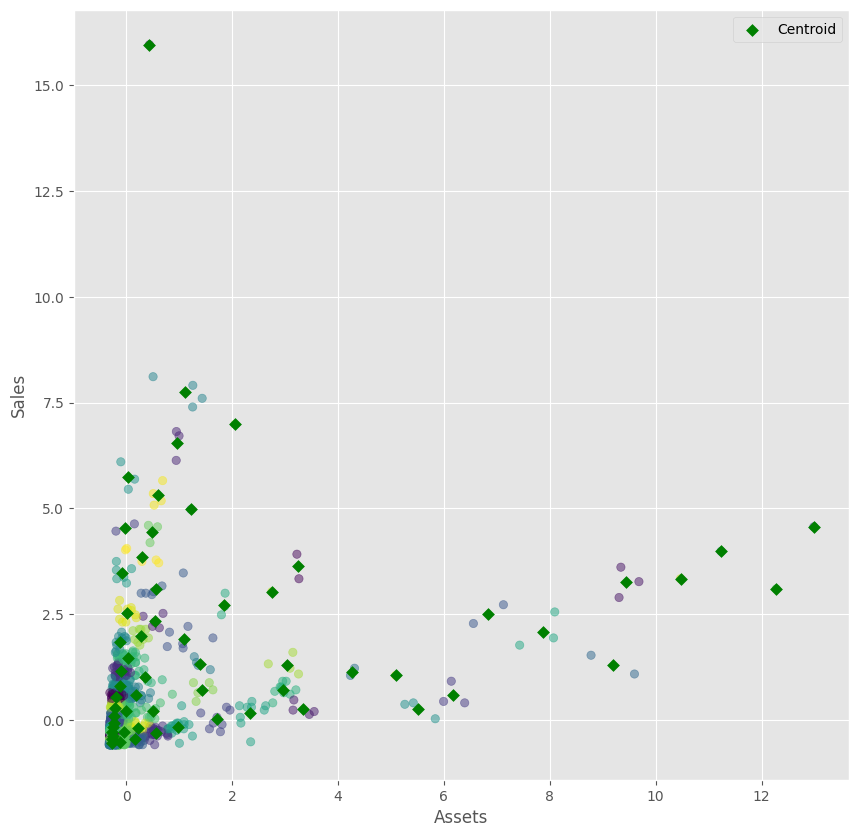

In [83]:
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.scatter(xs, ys, c = labels, alpha = 0.5 ) 
plt.scatter(centroids_x, centroids_y, c = 'green', marker = 'D', label = 'Centroid')
plt.xlabel('Assets')
plt.ylabel('Sales')
plt.legend()
plt.show()

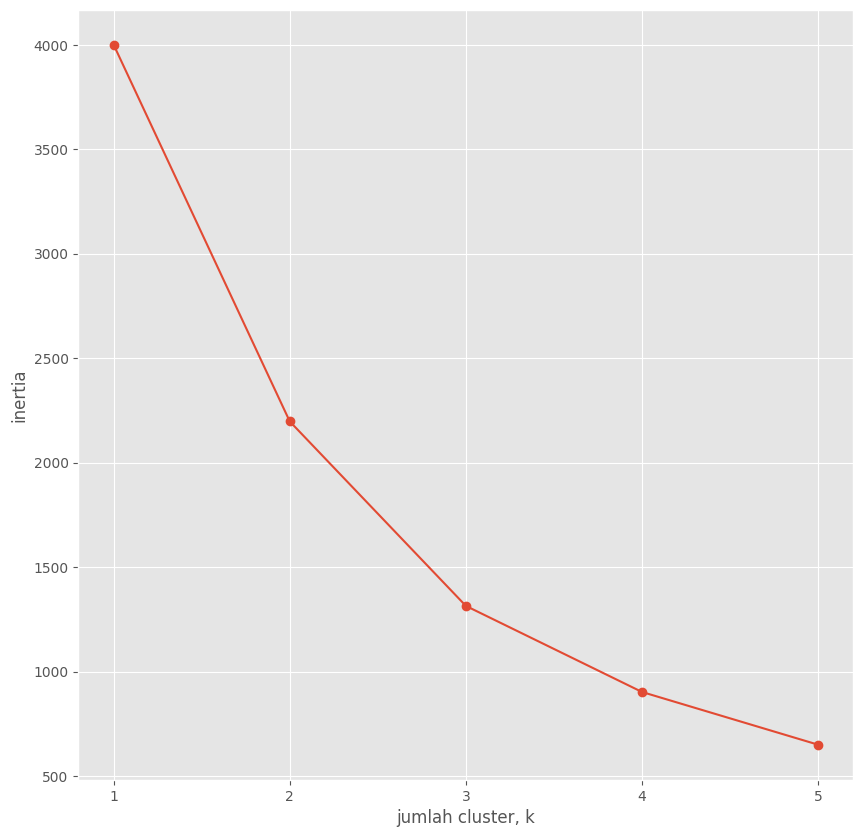

In [84]:
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('jumlah cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()